# Porject 4: Nasser Alsubait

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import ImputingValues as t
import seaborn as sns
import re
%matplotlib inline
pd.set_option('display.max_columns', 500)


df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

In [2]:
# Plot Function
def plot(data,title,xlabel,ylabel):
   
    """
    data: in panda series
    title: the title of the plot
    xlabel: the x axis label
    ylabel: y axis label
    
    """
    plt.style.use('fivethirtyeight')
    ind = np.arange(len(data))  # the x locations for the groups
    width = 0.3  # the width of the bars
    fig, ax = plt.subplots(figsize=(12,6))

    ax.bar(ind - width/2, data, width)


    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(str(title))
    ax.set_xticks(ind)
    ax.set_xticklabels(data.index)
    plt.xticks(rotation=90)
    ax.legend()
    
    

In [3]:
def plot2(data,x,y,title,ylabel,xlabel):
    
    """
    This function return box plot for the data provided
    data: dataframe
    x: columns which has the x axis data
    y: columns which has the y axis data
    title: the title of the plot
    xlabel: the x axis label
    ylabel: y axis label
    """
    
    
    ax = sns.boxplot(x=x,y=y,data=data,width=0.1)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

# Business Understanding 

The Business problem here is revolving around the question _What programming languges to learn for those who want to take application development as career_. This question can be broken into 3 questions that can give a direction for those who are interested to start career in this feilds.

- Which Programming Language have been picked the most among Professionals?
- How These group of professional are doing in terms of: ( Professionals who picked JavaScript language, how are they doing in terms of:
		a. Career satisfaction 
		b. Job satisfaction 
		c. Salary 
        
- What programming language to watch out for depending on these professionals choice ?


# Data Understanding 

The data avaiable has many fields that touches many aspects. Looking at the schema of the data fields it is clear that not all fields are important to answer the questions proposed above. To answer these question suffeenctly we need to know:
- What professional developers have picked from the list of programming language as the program they used
- Salary
- Job satisfaction 
- Career satisfaction
- And, what programming language they want to learn in future

In [4]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 22.4+ MB


In [6]:
# Taking what we are interested in to answer our 3 questions
df['HaveWorkedLanguage'] = df['HaveWorkedLanguage'].str.replace(re.escape('C++'),'CPlusPlus')
df = df[['Respondent','Professional','CareerSatisfaction','JobSatisfaction','Salary','HaveWorkedLanguage','WantWorkLanguage']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Data columns (total 7 columns):
Respondent            19102 non-null int64
Professional          19102 non-null object
CareerSatisfaction    16102 non-null float64
JobSatisfaction       15253 non-null float64
Salary                5009 non-null float64
HaveWorkedLanguage    13526 non-null object
WantWorkLanguage      12523 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 1.0+ MB


# Data Preparation 

For the columns: HaveWorkedLanguage and WantWorkLanguage, the information is stored in comma sepreated values. I used a the function below to decouple the information into a seprate line and eliminate any NaN value. Also, I replaced "C++" with the word "CPlusPlus" since the ++ need an escape charachter every time we loop and compare its value

In [7]:

def gene(df,cols,key):
    df= df.set_index('Respondent')
    df = df[df['Professional']=='Professional developer']
    unnested_lst = []
    
    for col in [cols]:
        unnested_lst.append(df[col].str.split(';').apply(pd.Series).stack())
    result = pd.concat(unnested_lst, axis=1, keys=[key])
    
    result.reset_index(inplace=True)
    result[key] = result[key].apply(lambda x:x.strip())
    result_series = result[key].value_counts()
    
    return result, result_series
    

In [8]:
result, result_rank2 = gene(df,cols='HaveWorkedLanguage',key='ProgramLanguage')

In [9]:
professional_list_js = result[result['ProgramLanguage']=='JavaScript']['Respondent'].tolist()

In [10]:
df2 = df.set_index('Respondent')
df_prof_js = df2.loc[professional_list_js]
df_prof_js.reset_index(inplace=True)

In [11]:
job_sata = df_prof_js.dropna(subset=['CareerSatisfaction','JobSatisfaction'])

In [12]:
result2 , result_rank = gene(df_prof_js,cols='WantWorkLanguage',key='WantToLearn')

# Analysis and Modeling

Our problem did not need a modeling to answer its question. I used predective statistics analysis to answer the question by plotting the data required.

# Validation

Since we did not build any model, this item is not valid

# Presentation

No handles with labels found to put in legend.


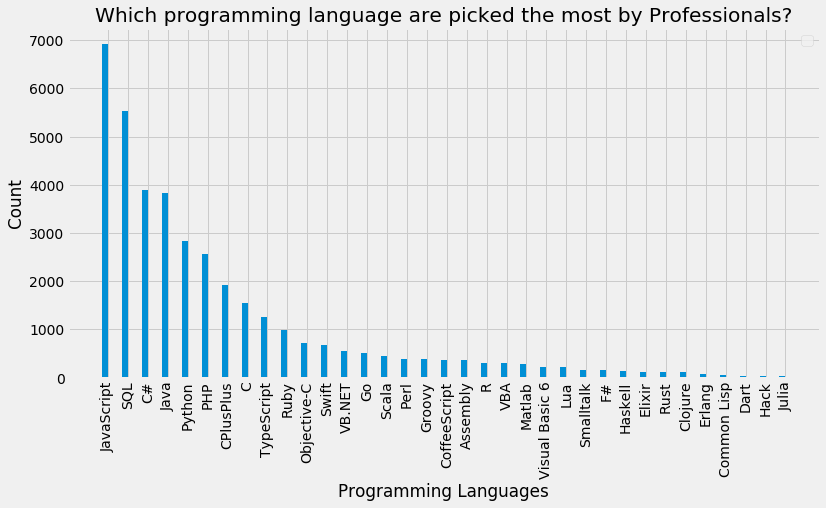

In [13]:
plot(result_rank2,'Which programming language are picked the most by Professionals?',ylabel='Count',xlabel='Programming Languages')

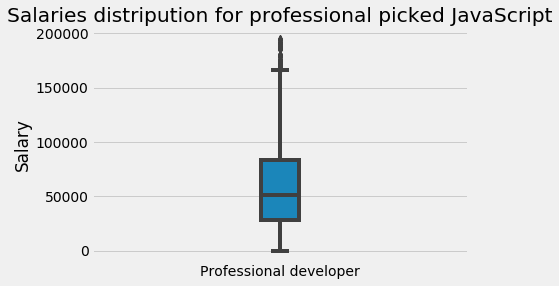

In [14]:
salary = df.dropna(subset=['Salary'])
plot2(data=salary,x='Professional',y='Salary',title='Salaries distripution for professional picked JavaScript',ylabel='Salary',xlabel="")

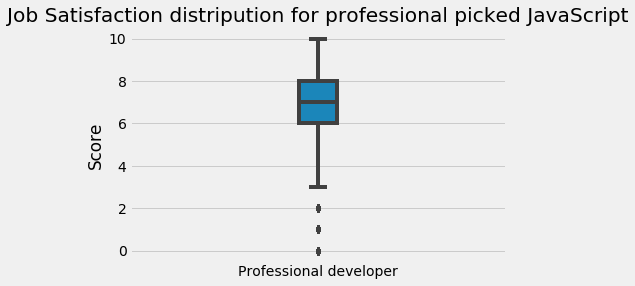

In [15]:
plot2(data=job_sata,x='Professional',y='JobSatisfaction',title='Job Satisfaction distripution for professional picked JavaScript',ylabel='Score',xlabel="")

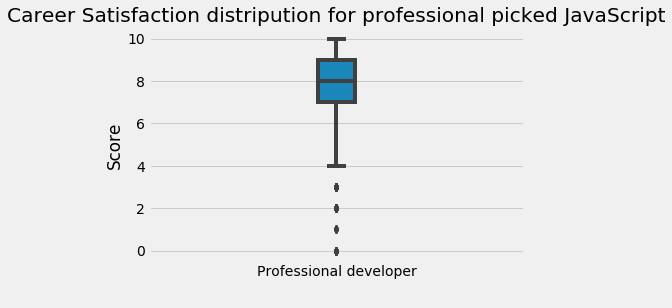

In [16]:
plot2(data=job_sata,x='Professional',y='CareerSatisfaction',title='Career Satisfaction distripution for professional picked JavaScript',ylabel='Score',xlabel=" ")

No handles with labels found to put in legend.


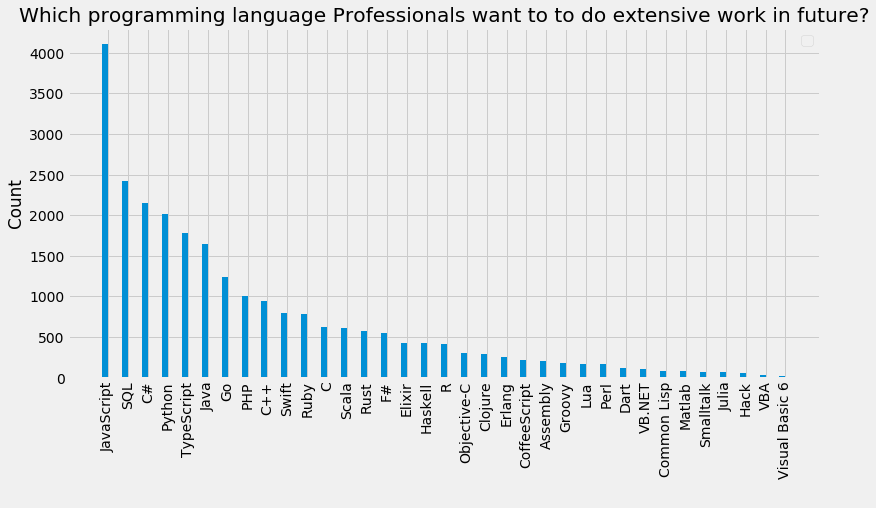

In [17]:
plot(result_rank,'Which programming language Professionals want to to do extensive work in future?'," ",'Count')